EDA

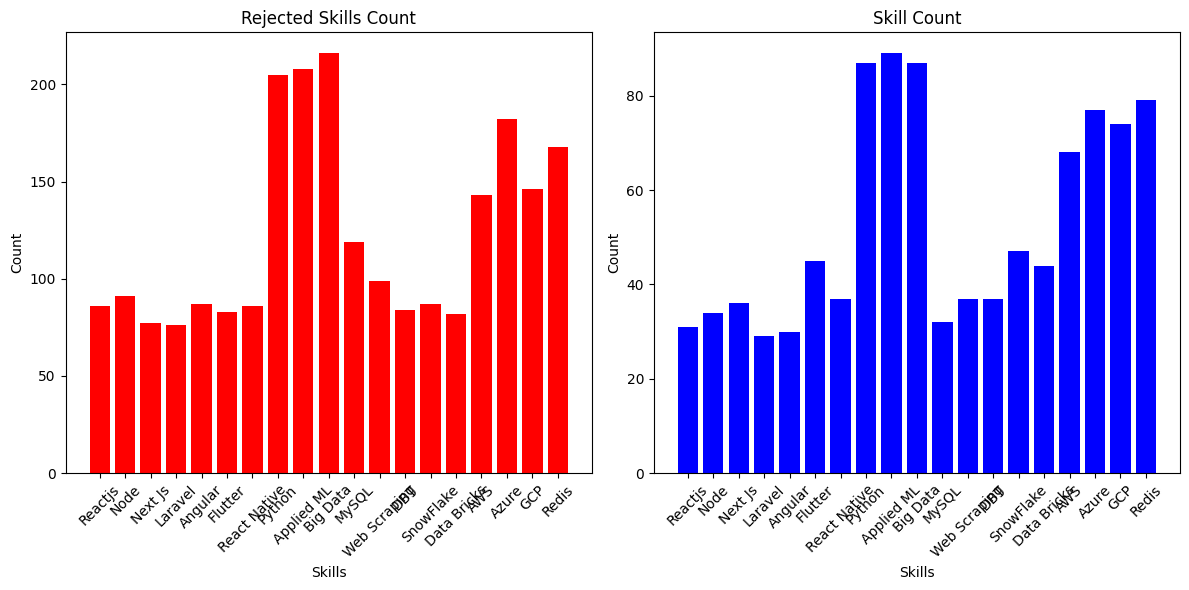

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths for your CSV files
rejected_file_path = "../REPORTING/rejected_skill_count.csv"
skill_count_file_path = '../REPORTING/skill_counts.csv'

# Read the CSV files into DataFrames
rejected_df = pd.read_csv(rejected_file_path)
skill_count_df = pd.read_csv(skill_count_file_path)

# Set up the bar graph for rejected skills
plt.figure(figsize=(12, 6))

# Bar graph for rejected skills
plt.subplot(1, 2, 1)
plt.bar(rejected_df['Skill'], rejected_df['Count'], color='red')
plt.title('Rejected Skills Count')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Bar graph for skill counts
plt.subplot(1, 2, 2)
plt.bar(skill_count_df['Skill'], skill_count_df['Count'], color='blue')
plt.title('Skill Count')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()


By seeing this Acceptance data for Target Column before nothing more difference the graph ratio between the skills

In [5]:
import pandas as pd

# Load the CSV file
file_path = 'D:\Projects\Web Scraping\Final Project\REPORTING\skillset_with_target_column.csv'  
df = pd.read_csv(file_path)

columns_to_drop = ['id']
df_cleaned = df.drop(columns=columns_to_drop)

# Save the cleaned DataFrame to a new CSV file
output_file_path = 'cleaned_data.csv'  # Update the output file path as needed
df_cleaned.to_csv(output_file_path, index=False)

print("New file created:", output_file_path)


New file created: cleaned_data.csv


<>:4: SyntaxWarning: invalid escape sequence '\P'
<>:4: SyntaxWarning: invalid escape sequence '\P'
C:\Users\PardhuMahidhar\AppData\Local\Temp\ipykernel_1064\1004172108.py:4: SyntaxWarning: invalid escape sequence '\P'
  file_path = 'D:\Projects\Web Scraping\Final Project\REPORTING\skillset_with_target_column.csv'


Correlation Matrix

Original DataFrame:
     id employeeId                                       Skillset  \
0   SS3       JMD1                               Flutter, Reactjs   
1   SS4      JMD10                              Redis, Azure, AWS   
2   SS6     JMD100                                       Big Data   
3   SS9     JMD101                                      SnowFlake   
4  SS12     JMD102  Web Scraping, DBT, MySQL, Data Bricks, Python   

   CourseDepartment  adjusted_score  average_score Suggested Skill  
0       Development      174.503155      87.251577    React Native  
1             Cloud      358.000000     119.333333             GCP  
2      Data Science       91.000000      91.000000      Applied ML  
3  Data Engineering       95.000000      95.000000     Data Bricks  
4  Data Engineering      444.000000      88.800000       SnowFlake  

Chi-Square Test:
Chi2 Statistic: 1312.5803627267042, p-value: 1.5195410364817303e-245


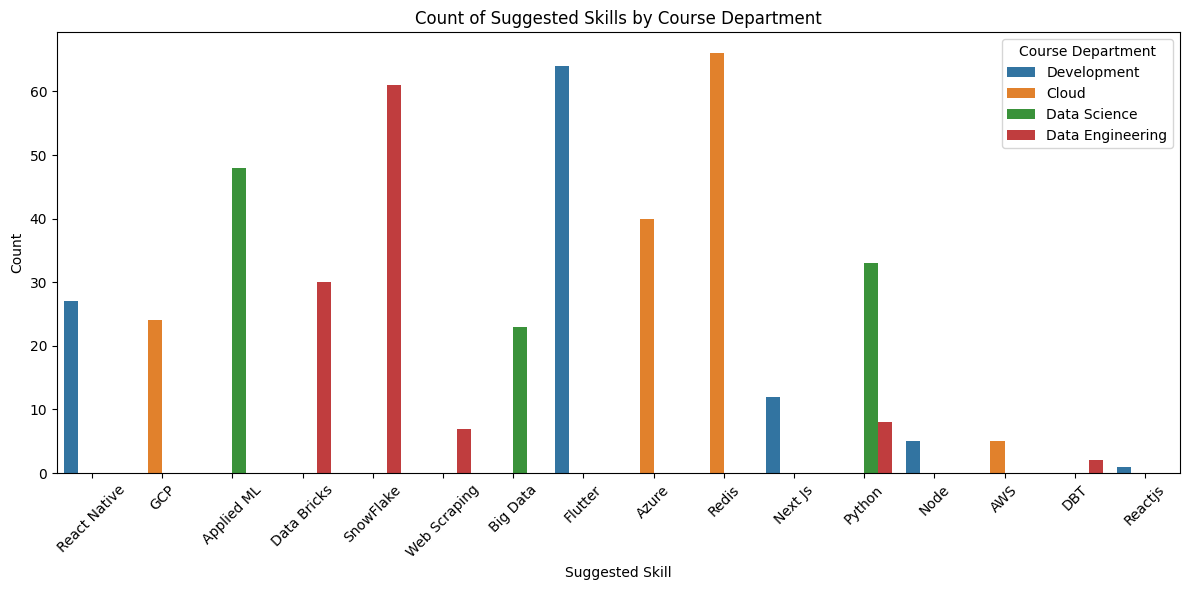

In [14]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_path = '../REPORTING/skillset_with_target_column.csv'  # Update this path as necessary
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print("Original DataFrame:")
print(df.head())

# One-Hot Encoding for the CourseDepartment and Suggested Skill columns
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform CourseDepartment
encoded_course_dept = encoder.fit_transform(df[['CourseDepartment']])
encoded_course_df = pd.DataFrame(encoded_course_dept, columns=encoder.get_feature_names_out(['CourseDepartment']))

# Fit and transform Suggested Skill
# Note: We need to use a new instance of OneHotEncoder to avoid fitting on the same data
encoder_skill = OneHotEncoder(sparse_output=False)
encoded_skills = encoder_skill.fit_transform(df[['Suggested Skill']])
encoded_skill_df = pd.DataFrame(encoded_skills, columns=encoder_skill.get_feature_names_out(['Suggested Skill']))

# Concatenate the original DataFrame with the encoded columns
df_encoded = pd.concat([df, encoded_course_df, encoded_skill_df], axis=1)

# Example: Checking the relationship between 'Suggested Skill' and 'CourseDepartment' using Chi-Square test
contingency_table = pd.crosstab(df['Suggested Skill'], df['CourseDepartment'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test:")
print(f"Chi2 Statistic: {chi2}, p-value: {p}")

# Visualizing the relationship
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Suggested Skill', hue='CourseDepartment')
plt.title('Count of Suggested Skills by Course Department')
plt.xticks(rotation=45)
plt.xlabel('Suggested Skill')
plt.ylabel('Count')
plt.legend(title='Course Department')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


In [7]:
# Step 1: Load the data from the CSV file
df = pd.read_csv('cleaned_data.csv')

# Remove rows with NaN values
df.dropna(inplace=True)

# Ensure that the necessary columns exist in the DataFrame
required_columns = ['Skillset', 'CourseDepartment', 'average_score', 'Suggested Skill']
if not all(col in df.columns for col in required_columns):
    raise ValueError("The input CSV must contain 'Skillset', 'CourseDepartment', 'average_score', and 'Suggested Skill' columns.")

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score, precision_score, f1_score, recall_score

# Step 1: Load the data
df = pd.read_csv('cleaned_data.csv')

# Step 2: Remove rows with null values
df = df.dropna()

# Step 3: Define features and target variable
X = df[['Skillset', 'CourseDepartment', 'average_score']]  # Feature columns
y = df['Suggested Skill']  # Target variable

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Preprocessing
# Define the preprocessor
numeric_features = ['average_score']
categorical_features = ['Skillset', 'CourseDepartment']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))  # Fill NaN with the mean for numeric features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill NaN with the most frequent value for categorical features
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Step 6: Create the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Step 7: Train the model
model.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = model.predict(X_test)

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Change average method if needed
f1 = f1_score(y_test, y_pred, average='weighted')  # Change average method if needed
recall = recall_score(y_test, y_pred, average='weighted')  # Change average method if needed

print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)
print("Recall:", recall)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7391304347826086
Precision: 0.7511036789297659
F1 Score: 0.6972260476096793
Recall: 0.7391304347826086
Classification Report:
               precision    recall  f1-score   support

         AWS       1.00      0.50      0.67         2
  Applied ML       1.00      1.00      1.00         4
       Azure       0.86      0.86      0.86         7
    Big Data       1.00      1.00      1.00         5
         DBT       0.00      0.00      0.00         2
 Data Bricks       1.00      0.50      0.67         6
     Flutter       0.44      1.00      0.61        11
         GCP       1.00      0.80      0.89         5
     Next Js       0.00      0.00      0.00         6
        Node       1.00      1.00      1.00         1
      Python       1.00      1.00      1.00         5
React Native       1.00      0.30      0.46        10
     Reactjs       0.00      0.00      0.00         1
       Redis       0.77      0.91      0.83        11
   SnowFlake       0.70      1.00      0.82       

c:\Users\PardhuMahidhar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PardhuMahidhar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PardhuMahidhar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

In [2]:
%pip install pandas scikit-learn


  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl (44.5 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


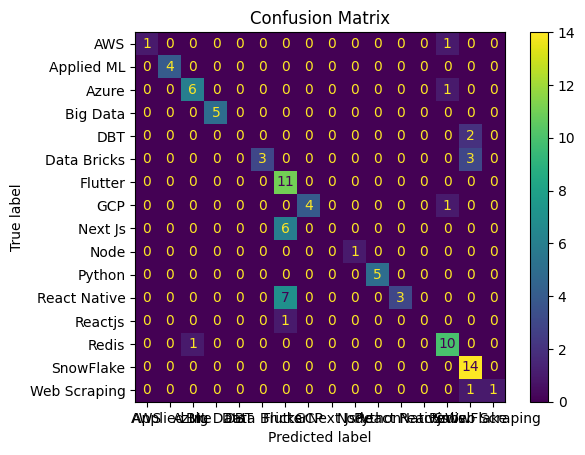

c:\Users\PardhuMahidhar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Scores: [0.80434783 0.75824176 0.84615385 0.83516484 0.8021978 ]
Mean CV Score: 0.8092212135690398
ROC Curve is not applicable for multi-class classification.


In [18]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import cross_val_score

# Assuming you have already trained your model and split your data
# Replace `model`, `X_train`, `X_test`, `y_train`, `y_test` with your actual variables
# For example:
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# Step 10: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Get unique classes to ensure correct labels
unique_classes = np.unique(y_test)

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes).plot()
plt.title('Confusion Matrix')
plt.show()

# Step 11: Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# Step 12: ROC Curve (if binary classification)
if len(np.unique(y)) == 2:  # Check for binary classification
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
else:
    print("ROC Curve is not applicable for multi-class classification.")


In [13]:
%pip install matplotlib

  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp312-cp312-win_amd64.whl.metadata (167 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-10.4.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl (218 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.54.1-cp312-cp312-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl (55 kB)
Using cached pillow-10.4.0-cp312-cp312-win_amd64.whl (2.6 MB)
Using cached pyparsing-3.1.4-py3-none-any.whl (104 kB)
Note: you may need to restart the kernel to use updated packages.
